Step 1: Importing the libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings, pickle

Step 2: Reading and analysing the Dataset

In [79]:
df = pd.read_csv("../data/online-fraud-dataset.csv")

In [80]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [81]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [82]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [83]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [84]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [85]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [86]:
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

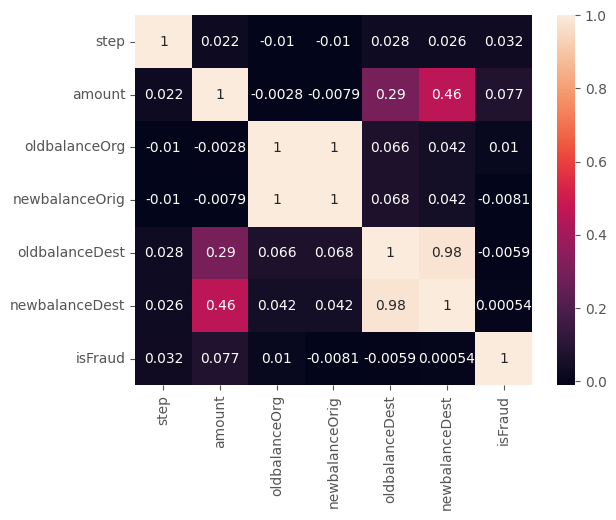

In [87]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Step 3 A: Univariate Analysis

<Axes: xlabel='step', ylabel='Count'>

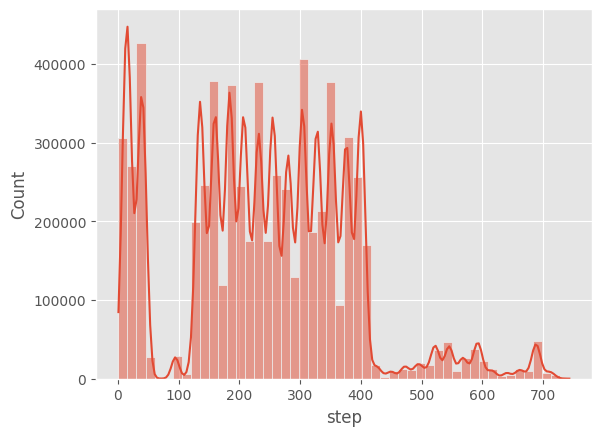

In [88]:
# step
sns.histplot(data=df,x='step',bins=50,kde=True)

<Axes: xlabel='step'>

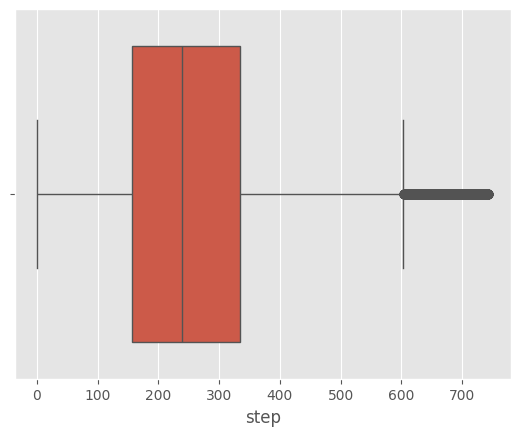

In [89]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

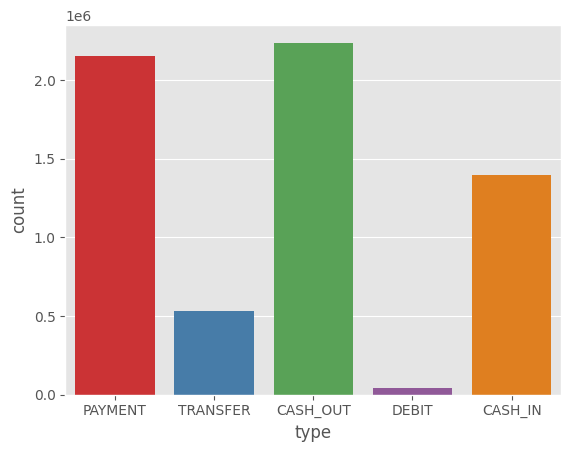

In [90]:
# type
sns.countplot(data=df,x='type',palette='Set1')

In [91]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='amount', ylabel='Count'>

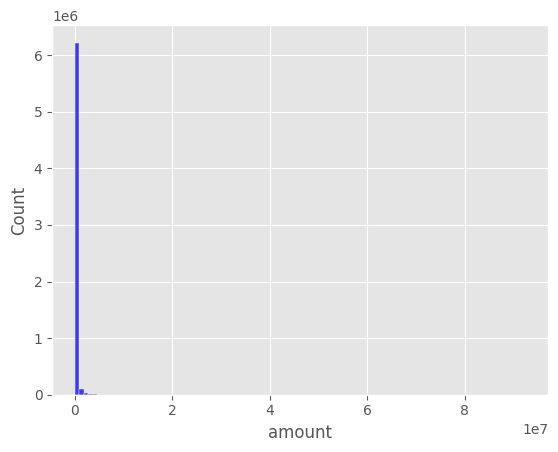

In [92]:
# amount
sns.histplot(data=df,x='amount',bins = 100, color='blue')

<Axes: xlabel='amount'>

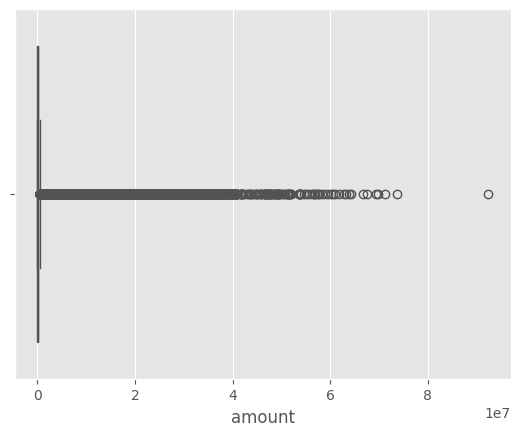

In [93]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

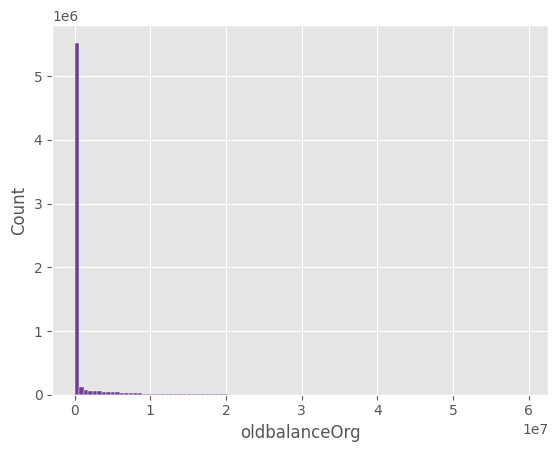

In [94]:
# oldBalanceOrg
sns.histplot(data=df,x='oldbalanceOrg', bins = 100, color='indigo')

In [95]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M295304806       1
M33419717        1
M1940055334      1
M335107734       1
M1757317128      1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

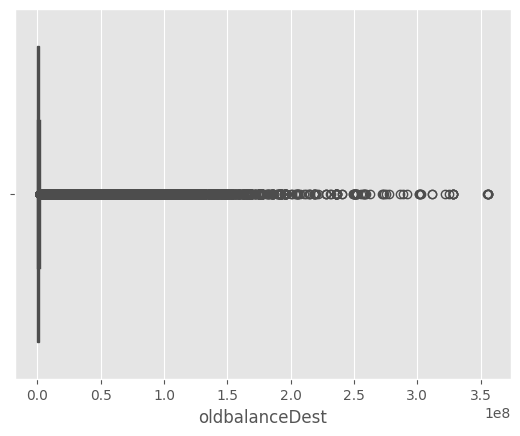

In [96]:
# oldBalanceDest
sns.boxplot(data=df,x='oldbalanceDest', color='cyan')

<Axes: xlabel='newbalanceDest'>

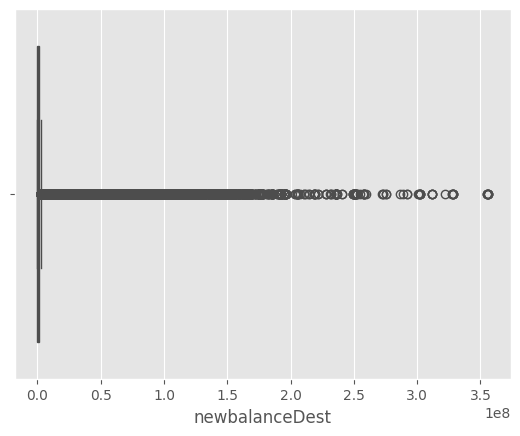

In [97]:
# newBalanceDest
sns.boxplot(data=df, x='newbalanceDest',color='cyan')

<Axes: xlabel='isFraud', ylabel='count'>

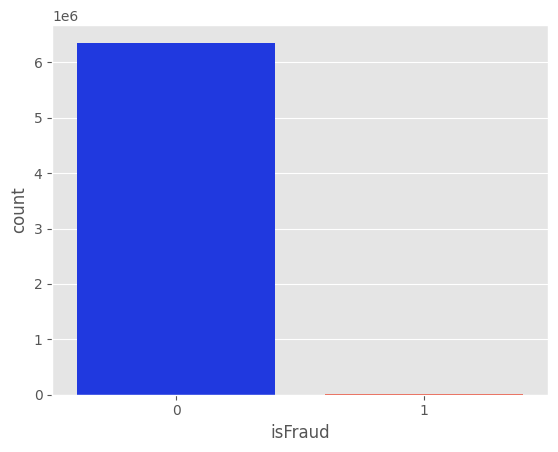

In [98]:
sns.countplot(data=df,x='isFraud', palette=['#0022ff','#ff4026'])

In [99]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [100]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1,'isFraud'] = 'is Fraud'

In [101]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,is Fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,is Fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,is Fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,is Fraud


Step 3 B: Bivariate Analysis

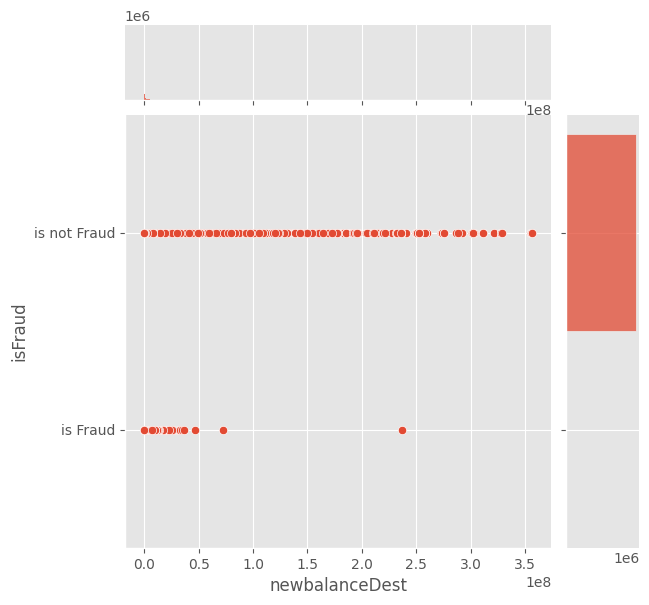

In [102]:
sns.jointplot(data=df, x="newbalanceDest", y="isFraud")

<Axes: xlabel='type', ylabel='count'>

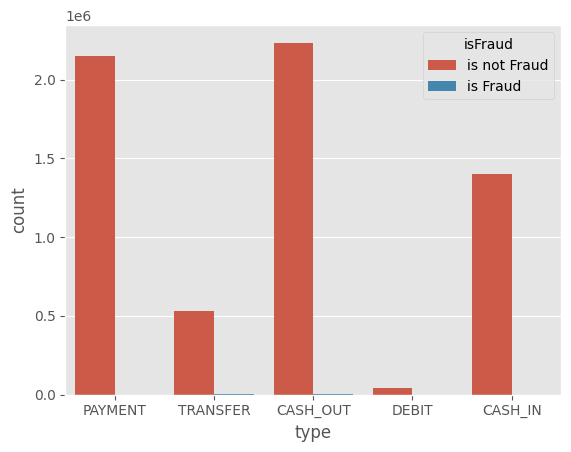

In [103]:
sns.countplot(data=df, x="type", hue="isFraud")

<Axes: xlabel='isFraud', ylabel='step'>

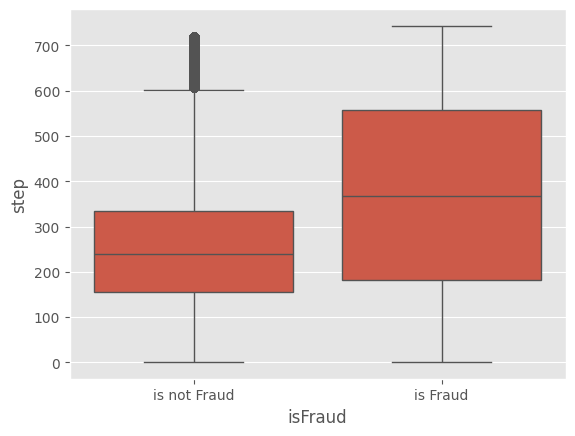

In [104]:
sns.boxplot(data=df, x="isFraud", y="step")

<Axes: xlabel='isFraud', ylabel='amount'>

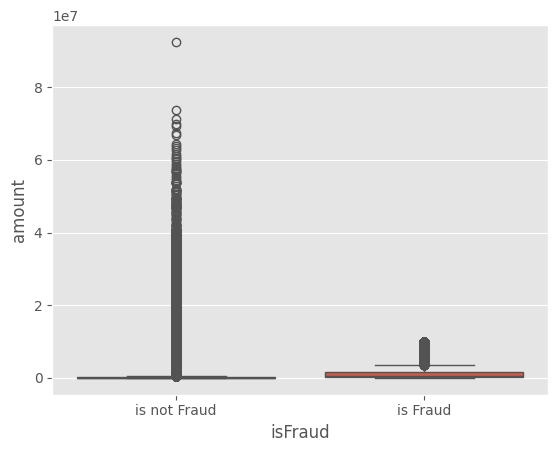

In [105]:
sns.boxplot(data=df, x="isFraud", y="amount")

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

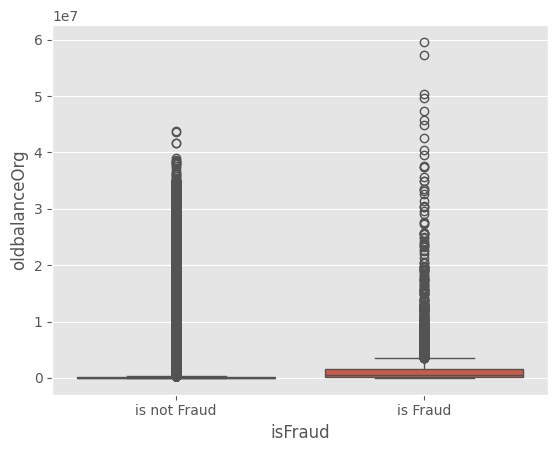

In [106]:
sns.boxplot(data=df, x="isFraud", y="oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

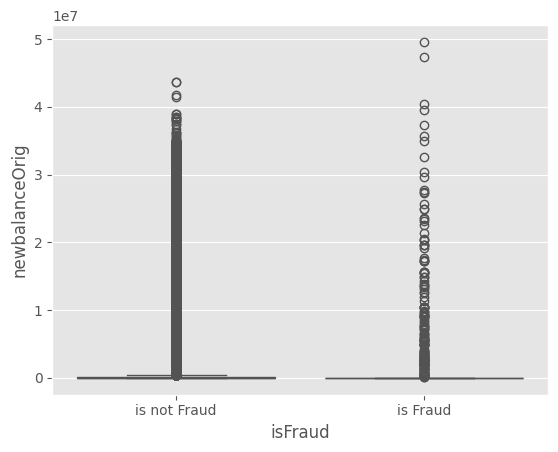

In [107]:
sns.boxplot(data=df, x="isFraud", y="newbalanceOrig")

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

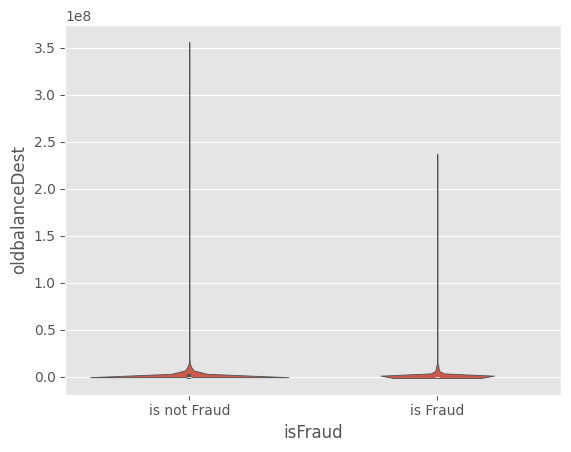

In [108]:
sns.violinplot(data=df, x="isFraud", y="oldbalanceDest")

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

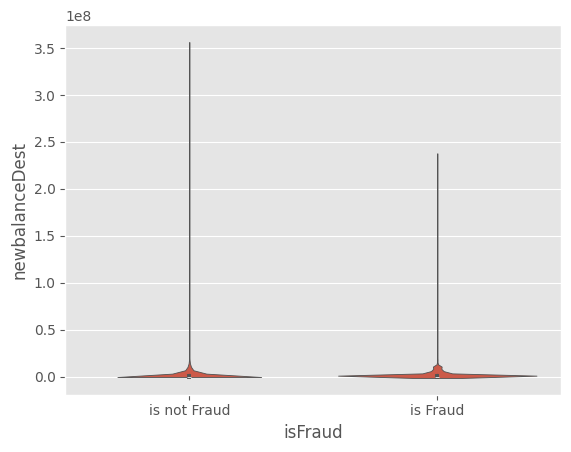

In [109]:
sns.violinplot(data=df, x="isFraud", y="newbalanceDest")

Step 3 C: Descriptive Analysis

In [110]:
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1677795071,NaN,NaN,C1286084959,NaN,NaN,is not Fraud
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN


Step 4: Data Preprocessing

In [111]:
# Checking Null Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
dtypes: float64(5), int64(1), object(4)
memory usage: 485.4+ MB


<Axes: xlabel='amount'>

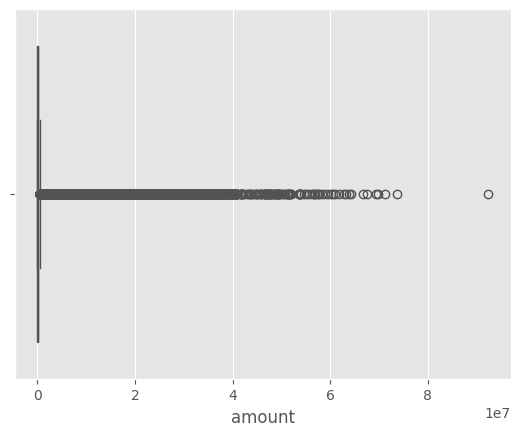

In [113]:
# Handling Outliers
sns.boxplot(x=df['amount'])

In [114]:
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [115]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)

IQR = q3 - q1

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print('q1', q1)
print('q3', q3)
print('IQR', IQR)
print('Upper Bound', upper_bound)
print('Lower Bound', lower_bound)

print('Skewed data', len(df[df['amount'] > upper_bound]))
print('Skewed data', len(df[df['amount'] < lower_bound]))

q1 13389.57
q3 208721.4775
IQR 195331.9075
Upper Bound 501719.33875
Lower Bound -279608.29125
Skewed data 338078
Skewed data 0


In [116]:
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(feature, kde=True, bins=100)
    plt.subplot(1,2,2)
    stats.probplot(feature, dist="norm", plot=plt)

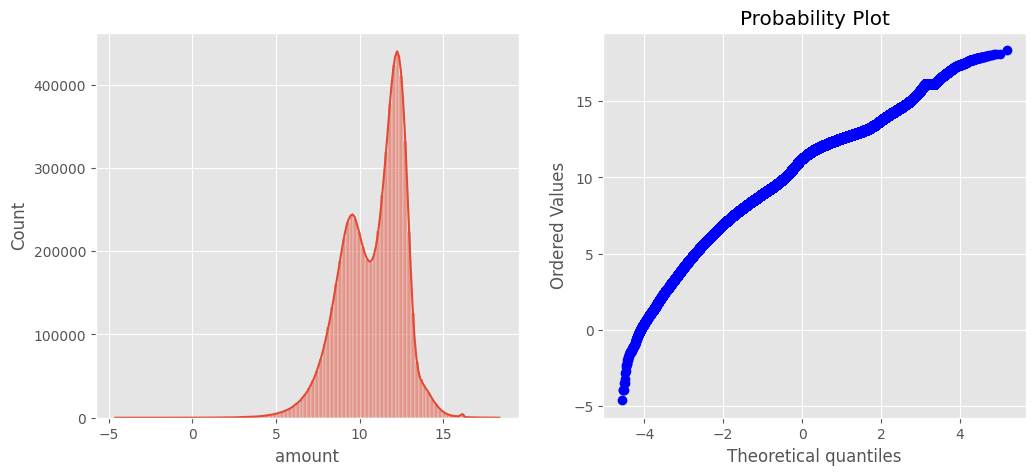

In [117]:
transformationPlot(np.log(df['amount']))

In [118]:
df['amount']=np.log(df['amount'])

In [119]:
# Object Label Coding

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])
mapping = dict(zip(la.classes_, la.transform(la.classes_)))
print(mapping)

{'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}


In [120]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [121]:
# Dividing the dataset into dependent and independent y and x respectively

X = df.drop(['isFraud','nameOrig','nameDest'],axis=1)
y = df['isFraud']

In [122]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.00,0.00
1,1,3,7.530630,21249.00,19384.72,0.00,0.00
2,1,4,5.198497,181.00,0.00,0.00,0.00
3,1,1,5.198497,181.00,0.00,21182.00,0.00
4,1,3,9.364617,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,12.735766,339682.13,0.00,0.00,339682.13
6362616,743,4,15.657870,6311409.28,0.00,0.00,0.00
6362617,743,1,15.657870,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,13.652995,850002.52,0.00,0.00,0.00


In [123]:
print(np.isinf(X).sum())

step               0
type               0
amount            16
oldbalanceOrg      0
newbalanceOrig     0
oldbalanceDest     0
newbalanceDest     0
dtype: int64


In [124]:
y

0          is not Fraud
1          is not Fraud
2              is Fraud
3              is Fraud
4          is not Fraud
               ...     
6362615        is Fraud
6362616        is Fraud
6362617        is Fraud
6362618        is Fraud
6362619        is Fraud
Name: isFraud, Length: 6362620, dtype: object

In [125]:
# Splitting Data into Train and Test (80-20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [126]:
print(X_test.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test.shape)

(1272524, 7)
(1272524, 7)
(1272524,)
(1272524,)


In [127]:
X_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1657090,158,1,11.512793,7845.07,0.00,914025.09,1014011.83
3056545,234,1,11.041411,16603.00,0.00,466525.55,528931.18
224722,14,4,14.644671,0.00,0.00,3729395.93,6020789.00
495935,20,0,9.559148,11447430.20,11461603.97,3047711.43,3033537.66
4412383,322,1,12.615743,0.00,0.00,806211.40,1107475.76
...,...,...,...,...,...,...,...
2249467,187,1,11.641247,4231.00,0.00,397758.64,511450.47
5157699,357,1,8.266668,20146.00,16254.04,253375.00,257266.97
2215104,186,0,11.287786,10152925.86,10232766.38,276175.87,196335.36
1484405,141,0,13.250940,1081784.28,1650388.77,2631796.49,2063191.99


In [128]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaNs in X_train and update y_train accordingly
train_valid_idx = X_train.dropna().index
X_train = X_train.loc[train_valid_idx]
y_train = y_train.loc[train_valid_idx]

# Do the same for X_test and y_test
test_valid_idx = X_test.dropna().index
X_test = X_test.loc[test_valid_idx]
y_test = y_test.loc[test_valid_idx]

Step 5: Model Building

In [129]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)
rfc.fit(X_train, y_train)

y_train_predict1 = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict1)
train_accuracy

0.9997037376404275

In [130]:
y_test_predict1 = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predict1)
test_accuracy

0.9996880208656674

In [131]:
pd.crosstab(y_test, y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1252,386
is not Fraud,11,1270872


In [132]:
print(classification_report(y_test, y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.99      0.76      0.86      1638
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272521
   macro avg       1.00      0.88      0.93   1272521
weighted avg       1.00      1.00      1.00   1272521



In [133]:
# Decision Tree Classifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_train_predict2=dtc.predict(X_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [134]:
y_test_predict2= dtc.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9997005943320385

In [135]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1436,202
is not Fraud,179,1270704


In [136]:
print(classification_report(y_test, y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.89      0.88      0.88      1638
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272521
   macro avg       0.94      0.94      0.94   1272521
weighted avg       1.00      1.00      1.00   1272521



In [137]:
# Extra Trees Classifier
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

y_train_predict3=etc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [138]:
y_test_predict3=etc.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy

0.9997092385901687

In [139]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1278,360
is not Fraud,10,1270873


In [140]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       0.99      0.78      0.87      1638
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272521
   macro avg       1.00      0.89      0.94   1272521
weighted avg       1.00      1.00      1.00   1272521



In [141]:
# Support Vector Machine Classifier
svc = LinearSVC()
svc.fit(X_train,y_train)

y_train_predict4=svc.predict(X_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9991715262796305

In [142]:
y_test_predict4=svc.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9991505051783035

In [143]:
pd.crosstab(y_test,y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,624,1014
is not Fraud,67,1270816


In [144]:
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.90      0.38      0.54      1638
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272521
   macro avg       0.95      0.69      0.77   1272521
weighted avg       1.00      1.00      1.00   1272521



In [145]:
la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [146]:
y_test1 = la.transform(y_test)
y_test1

array([1, 1, 1, ..., 1, 1, 1], shape=(1272521,))

In [147]:
y_train1

array([1, 1, 1, ..., 1, 1, 1], shape=(5090083,))

In [148]:
# XGBoost Classifier
xgb1 = xgb.XGBClassifier()
xgb1.fit(X_train, y_train1)

y_train_predict5 = xgb1.predict(X_train)
train_accuracy = accuracy_score(y_train1, y_train_predict5)
train_accuracy

0.9996860561998694

In [149]:
y_test_predict5 = xgb1.predict(X_test)
test_accuracy = accuracy_score(y_test1, y_test_predict5)
test_accuracy

0.9996613022496289

In [150]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,1321,317
1,114,1270769


In [151]:
print(classification_report(y_test1, y_test_predict5))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1638
           1       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272521
   macro avg       0.96      0.90      0.93   1272521
weighted avg       1.00      1.00      1.00   1272521



Step 6: Model Comparison

In [152]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc", accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc", accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc", accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc", accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc", accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc", accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svcc", accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1", accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1", accuracy_score(y_test_predict5,y_test1))

In [153]:
compareModel()

train accuracy for rfc 0.9997037376404275
test accuracy for rfc 0.9996880208656674
train accuracy for dtc 1.0
test accuracy for dtc 0.9997005943320385
train accuracy for etc 1.0
test accuracy for etc 0.9997092385901687
train accuracy for svc 0.9991715262796305
test accuracy for svcc 0.9991505051783035
train accuracy for xgb1 0.9996860561998694
test accuracy for xgb1 0.9996613022496289


Step 7: Evaluating performance of the model and saving the model

In [154]:
# Saving best performing model (ETC)
pickle.dump(etc, open('payments.pkl','wb'))